# 1. Data Description

In [2]:
import pandas as pd

# Define the data as a list of lists
data = [
    ["state", "State abbreviation (KS = Kansas)", "String", "Categorical"],
    ["account_length", "How long the client has been with the company", "Numerical", "Quantitative"],
    ["area_code", "Phone number prefix", "String", "Categorical"],
    ["international_plan", "International plan (on/off)", "String, 'Yes'/'No'", "Categorical/Binary"],
    ["voice_mail_plan", "Voicemail (on/off)", "String, 'Yes'/'No'", "Categorical/Binary"],
    ["number_vmail_messages", "Number of voicemail messages", "Numerical", "Quantitative"],
    ["total_day_minutes", "Total duration of daytime calls", "Numerical", "Quantitative"],
    ["total_day_calls", "Total number of daytime calls", "Numerical", "Quantitative"],
    ["total_day_charge", "Total charge for daytime services", "Numerical", "Quantitative"],
    ["total_eve_minutes", "Total duration of evening calls", "Numerical", "Quantitative"],
    ["total_eve_calls", "Total number of evening calls", "Numerical", "Quantitative"],
    ["total_eve_charge", "Total charge for evening services", "Numerical", "Quantitative"],
    ["total_night_minutes", "Total duration of nighttime calls", "Numerical", "Quantitative"],
    ["total_night_calls", "Total number of nighttime calls", "Numerical", "Quantitative"],
    ["total_night_charge", "Total charge for nighttime services", "Numerical", "Quantitative"],
    ["total_intl_minutes", "Total duration of international calls", "Numerical", "Quantitative"],
    ["total_intl_calls", "Total number of international calls", "Numerical", "Quantitative"],
    ["total_intl_charge", "Total charge for international calls", "Numerical", "Quantitative"],
    ["number_customer_service_calls", "Number of calls to customer service", "Numerical", "Categorical/Ordinal"]
]

# Create a DataFrame from the data
df = pd.DataFrame(data, columns=["Name", "Description", "Value Type", "Statistical Type"])

# Display the DataFrame
df

,Name,Description,Value Type,Statistical Type
0,state,State abbreviation (KS = Kansas),String,Categorical
1,account_length,How long the client has been with the company,Numerical,Quantitative
2,area_code,Phone number prefix,String,Categorical
3,international_plan,International plan (on/off),"String, 'Yes'/'No'",Categorical/Binary
4,voice_mail_plan,Voicemail (on/off),"String, 'Yes'/'No'",Categorical/Binary
5,number_vmail_messages,Number of voicemail messages,Numerical,Quantitative
6,total_day_minutes,Total duration of daytime calls,Numerical,Quantitative
7,total_day_calls,Total number of daytime calls,Numerical,Quantitative
8,total_day_charge,Total charge for daytime services,Numerical,Quantitative
9,total_eve_minutes,Total duration of evening calls,Numerical,Quantitative


The last data column is `Churn` as a target variable. It is binary: `Yes` indicates that that the company eventually lost the customer and `No` indicates that the customer was retained.

# 2. Import Libraries and Load Data

In [3]:
# Import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

sns.set()

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'


In [4]:
# Path of the file with escaped backslashes
file_path = r"C:\python-project\green-academy\final-project\Data_Train_Churn.csv"

# Read the Excel file into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the DataFrame
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [5]:
# Display of the data dimensionality (rows and columns)
df.shape

(4250, 20)

In [6]:
# list of columns name
df.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [7]:
# info of each columns for check non-null and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [8]:
# Count null or empty values in each column
null_counts = df.isna().sum()

# Print the counts
print(null_counts)

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64


In [9]:
def encode_yes_no(value):
  if value == "yes":
    return 1
  elif value == "no":
    return 0
  else:
    return 0

def decode_yes_no(value):
  if value == 1:
    return "yes"
  elif value == 0:
    return "no"

df["churn_flag"] = df["churn"].apply(encode_yes_no)
df["international_plan"] = df["international_plan"].apply(encode_yes_no)
df["voice_mail_plan"] = df["voice_mail_plan"].apply(encode_yes_no)

df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,churn_flag
0,OH,107,area_code_415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no,0
1,NJ,137,area_code_415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no,0
2,OH,84,area_code_408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no,0
3,OK,75,area_code_415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no,0
4,MA,121,area_code_510,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no,0


# 3. Exploratory Data Analysis

## 3.1 Churn (target_variable)

In [10]:
def create_count_plot(feature, orient = "horizontal"):
  feature_agg = feature.value_counts()
  feature_index = feature_agg.index
  feature_values = feature_agg.values
  display(feature_agg)
  display(feature_agg/len(feature))
  if orient == "horizontal":
    sns.barplot(x = feature_index, y = feature_values)
    plt.show()
  elif orient == "vertical":
    sns.barplot(y = feature_index, x = feature_values)
    plt.show()

churn
no     3652
yes     598
Name: count, dtype: int64

churn
no     0.859294
yes    0.140706
Name: count, dtype: float64

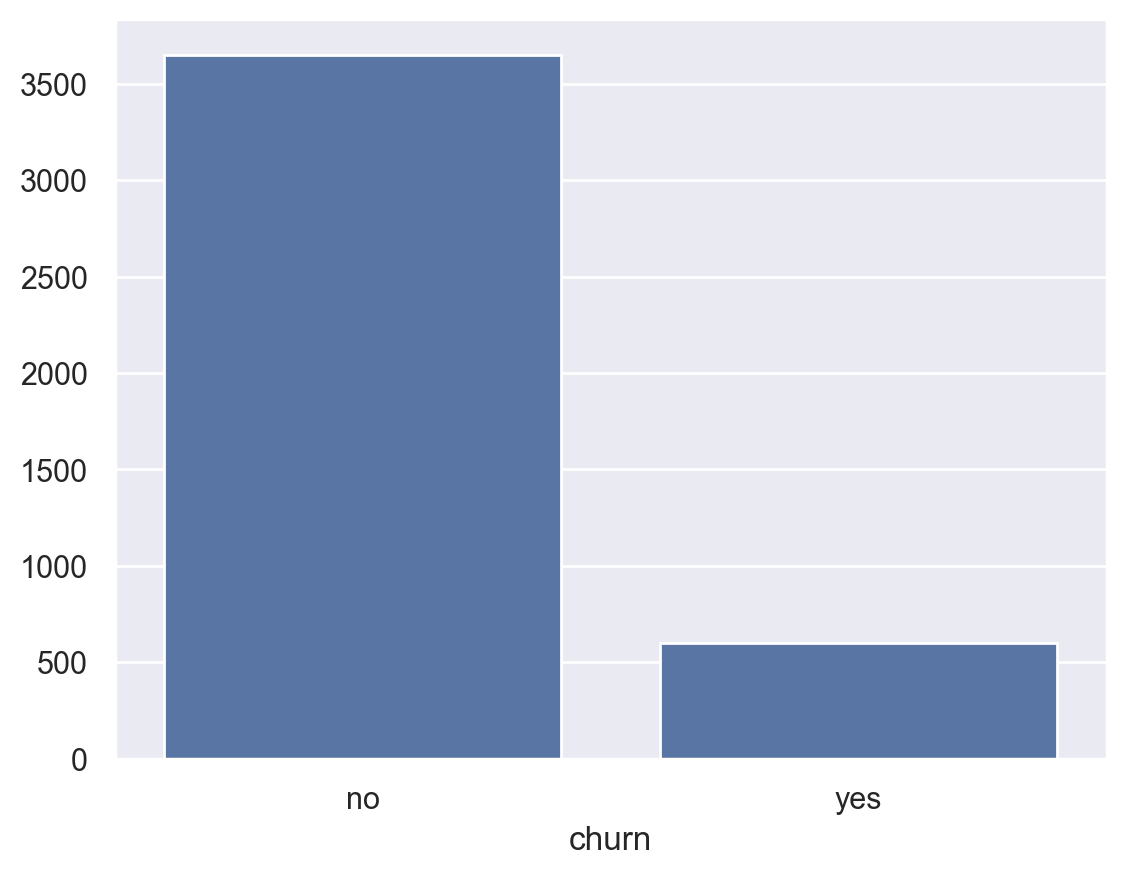

In [11]:
create_count_plot(df["churn"], orient = "horizontal")

From the Target Variable we can see There are around 15% customer that are churn

## 3.2 Categorical Characteristics
  - State
  - area_code
  - international_plan
  - voice_mail_plan


In [12]:
def target_mean_agg(features=[],target="churn_flag", data=df):
  usecol = features+[target]
  df_agg = data[usecol].groupby(features).agg([np.mean,np.min,np.max,np.var,"count"])
  return df_agg.sort_values([(target,"mean")],ascending=False)

def check_train_test_availability(features=None, train_data=df):
  train_col_list = train_data[features].unique().tolist()
  # Filter elements not in train_col_list using list comprehension
  cat_non_avail = [col for col in train_data.columns if col not in train_col_list]
  return cat_non_avail

### State

In [13]:
display(check_train_test_availability(features="state",train_data=df))
target_mean_agg(features = ["state"],
                target = "churn_flag",
                data=df).head(10)

['state',
 'account_length',
 'area_code',
 'international_plan',
 'voice_mail_plan',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls',
 'churn',
 'churn_flag']

churn_flag                        
            mean min max       var count
state                                   
NJ      0.270833   0   1  0.199561    96
CA      0.256410   0   1  0.195682    39
WA      0.225000   0   1  0.176582    80
MD      0.220930   0   1  0.174145    86
MT      0.212500   0   1  0.169462    80
OK      0.205128   0   1  0.165168    78
NV      0.204819   0   1  0.164855    83
SC      0.194444   0   1  0.158842    72
TX      0.193878   0   1  0.157900    98
MS      0.182927   0   1  0.151310    82

### Area Code

['state',
 'account_length',
 'area_code',
 'international_plan',
 'voice_mail_plan',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls',
 'churn',
 'churn_flag']

churn_flag                        
                    mean min max       var count
area_code                                       
area_code_510   0.150568   0   1  0.128019  1056
area_code_408   0.139963   0   1  0.120484  1086
area_code_415   0.136148   0   1  0.117668  2108

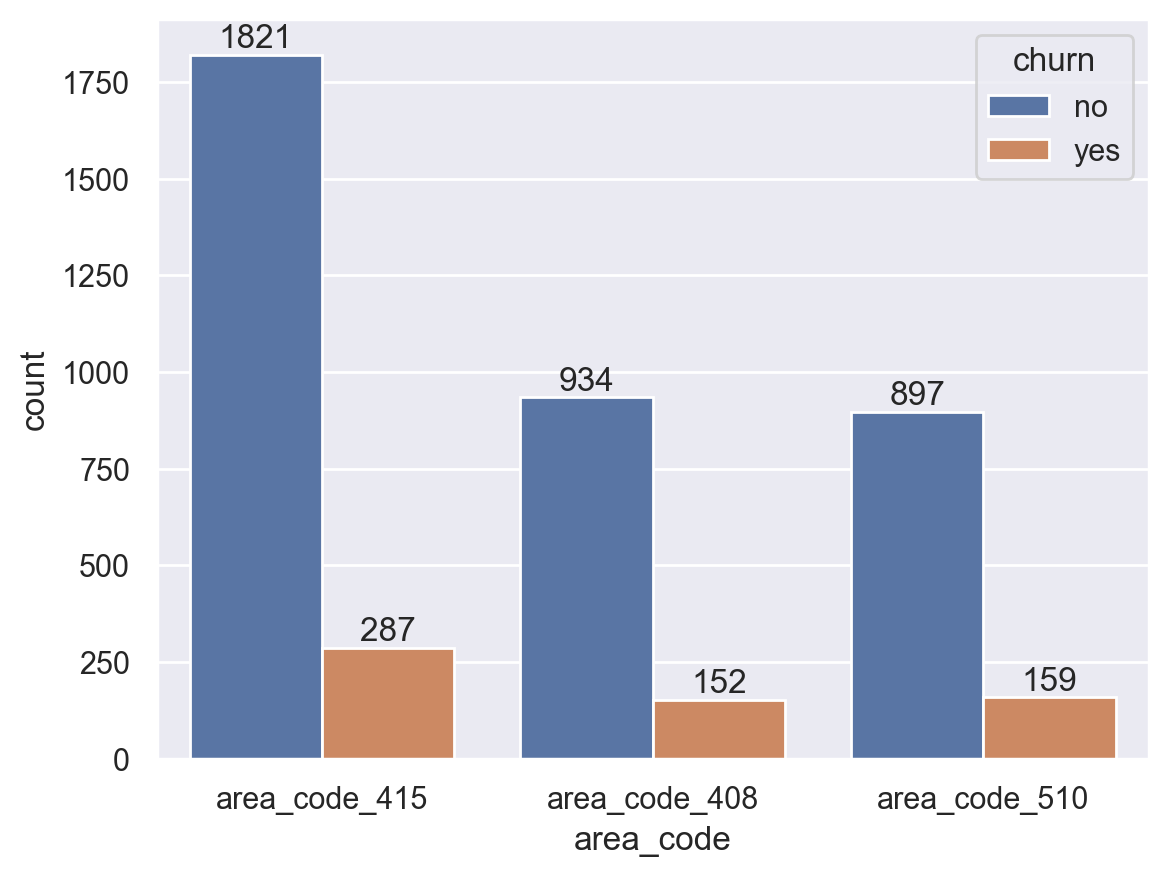

In [14]:
ax = sns.countplot(x=df["area_code"],
              hue=df["churn"])
for i in ax.containers:
    ax.bar_label(i,)

display(check_train_test_availability(features="area_code",train_data=df))
target_mean_agg(features=["area_code"],
                target = "churn_flag",
                data=df)

### international_plan

['state',
 'account_length',
 'area_code',
 'international_plan',
 'voice_mail_plan',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls',
 'churn',
 'churn_flag']

churn_flag                        
                         mean min max       var count
international_plan                                   
1                    0.421717   0   1  0.244489   396
0                    0.111832   0   1  0.099351  3854

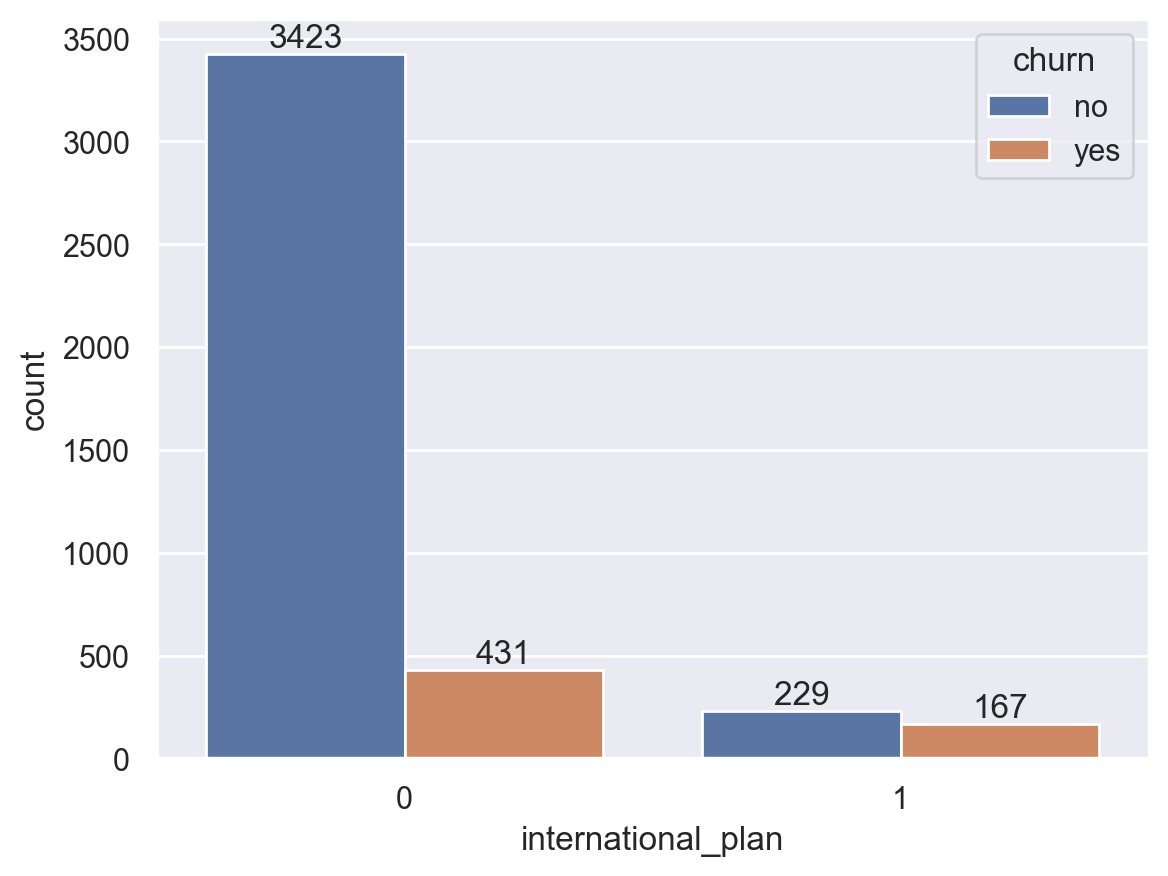

In [15]:
ax = sns.countplot(x=df["international_plan"],
              hue=df["churn"])
for i in ax.containers:
    ax.bar_label(i,)

display(check_train_test_availability(features="international_plan",train_data=df))
target_mean_agg(features=["international_plan"],
                target = "churn_flag",
                data=df)

### voice_mail_plan

['state',
 'account_length',
 'area_code',
 'international_plan',
 'voice_mail_plan',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls',
 'churn',
 'churn_flag']

churn_flag                        
                      mean min max       var count
voice_mail_plan                                   
0                 0.164436   0   1  0.137441  3138
1                 0.073741   0   1  0.068365  1112

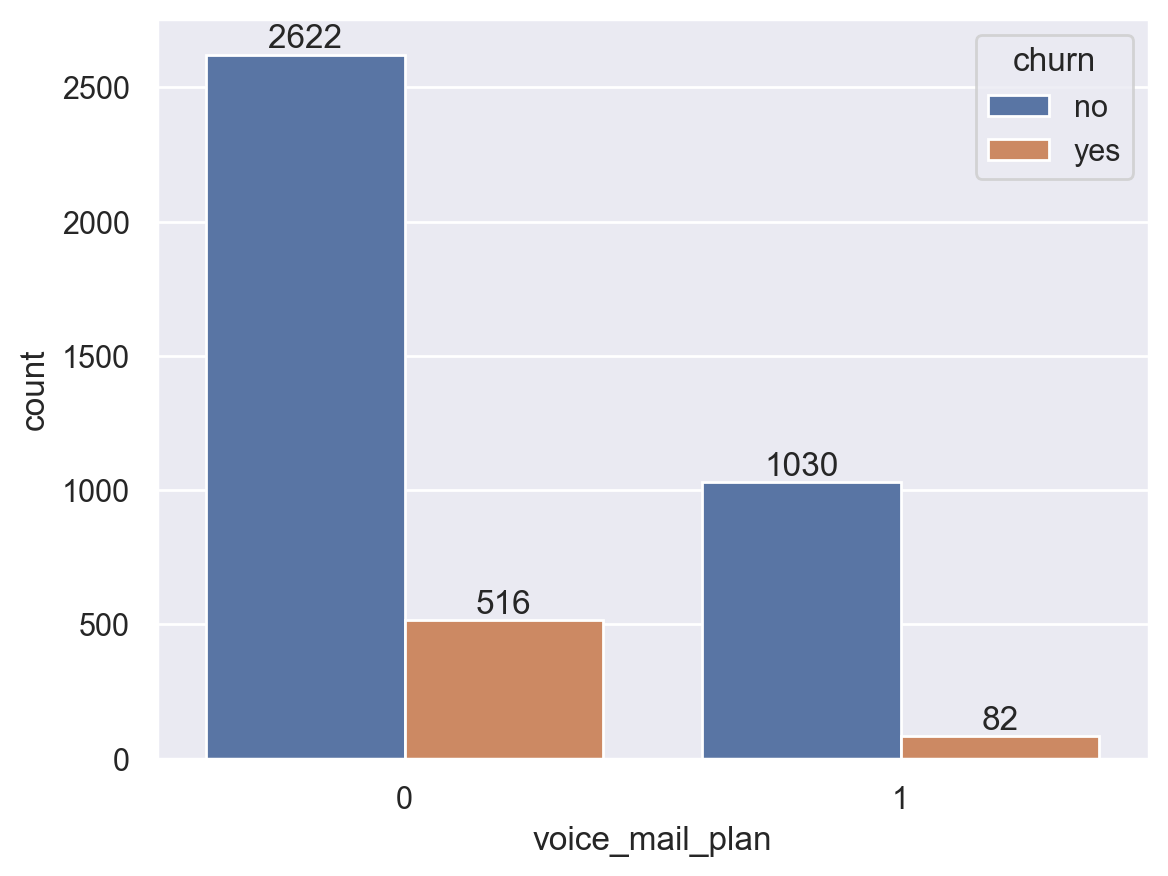

In [16]:
ax = sns.countplot(x=df["voice_mail_plan"],
              hue=df["churn"])
for i in ax.containers:
    ax.bar_label(i,)

display(check_train_test_availability(features="voice_mail_plan",train_data=df))
target_mean_agg(features=["voice_mail_plan"],
                target = "churn_flag",
                data=df)

## 3.3 Numerical Characteristics

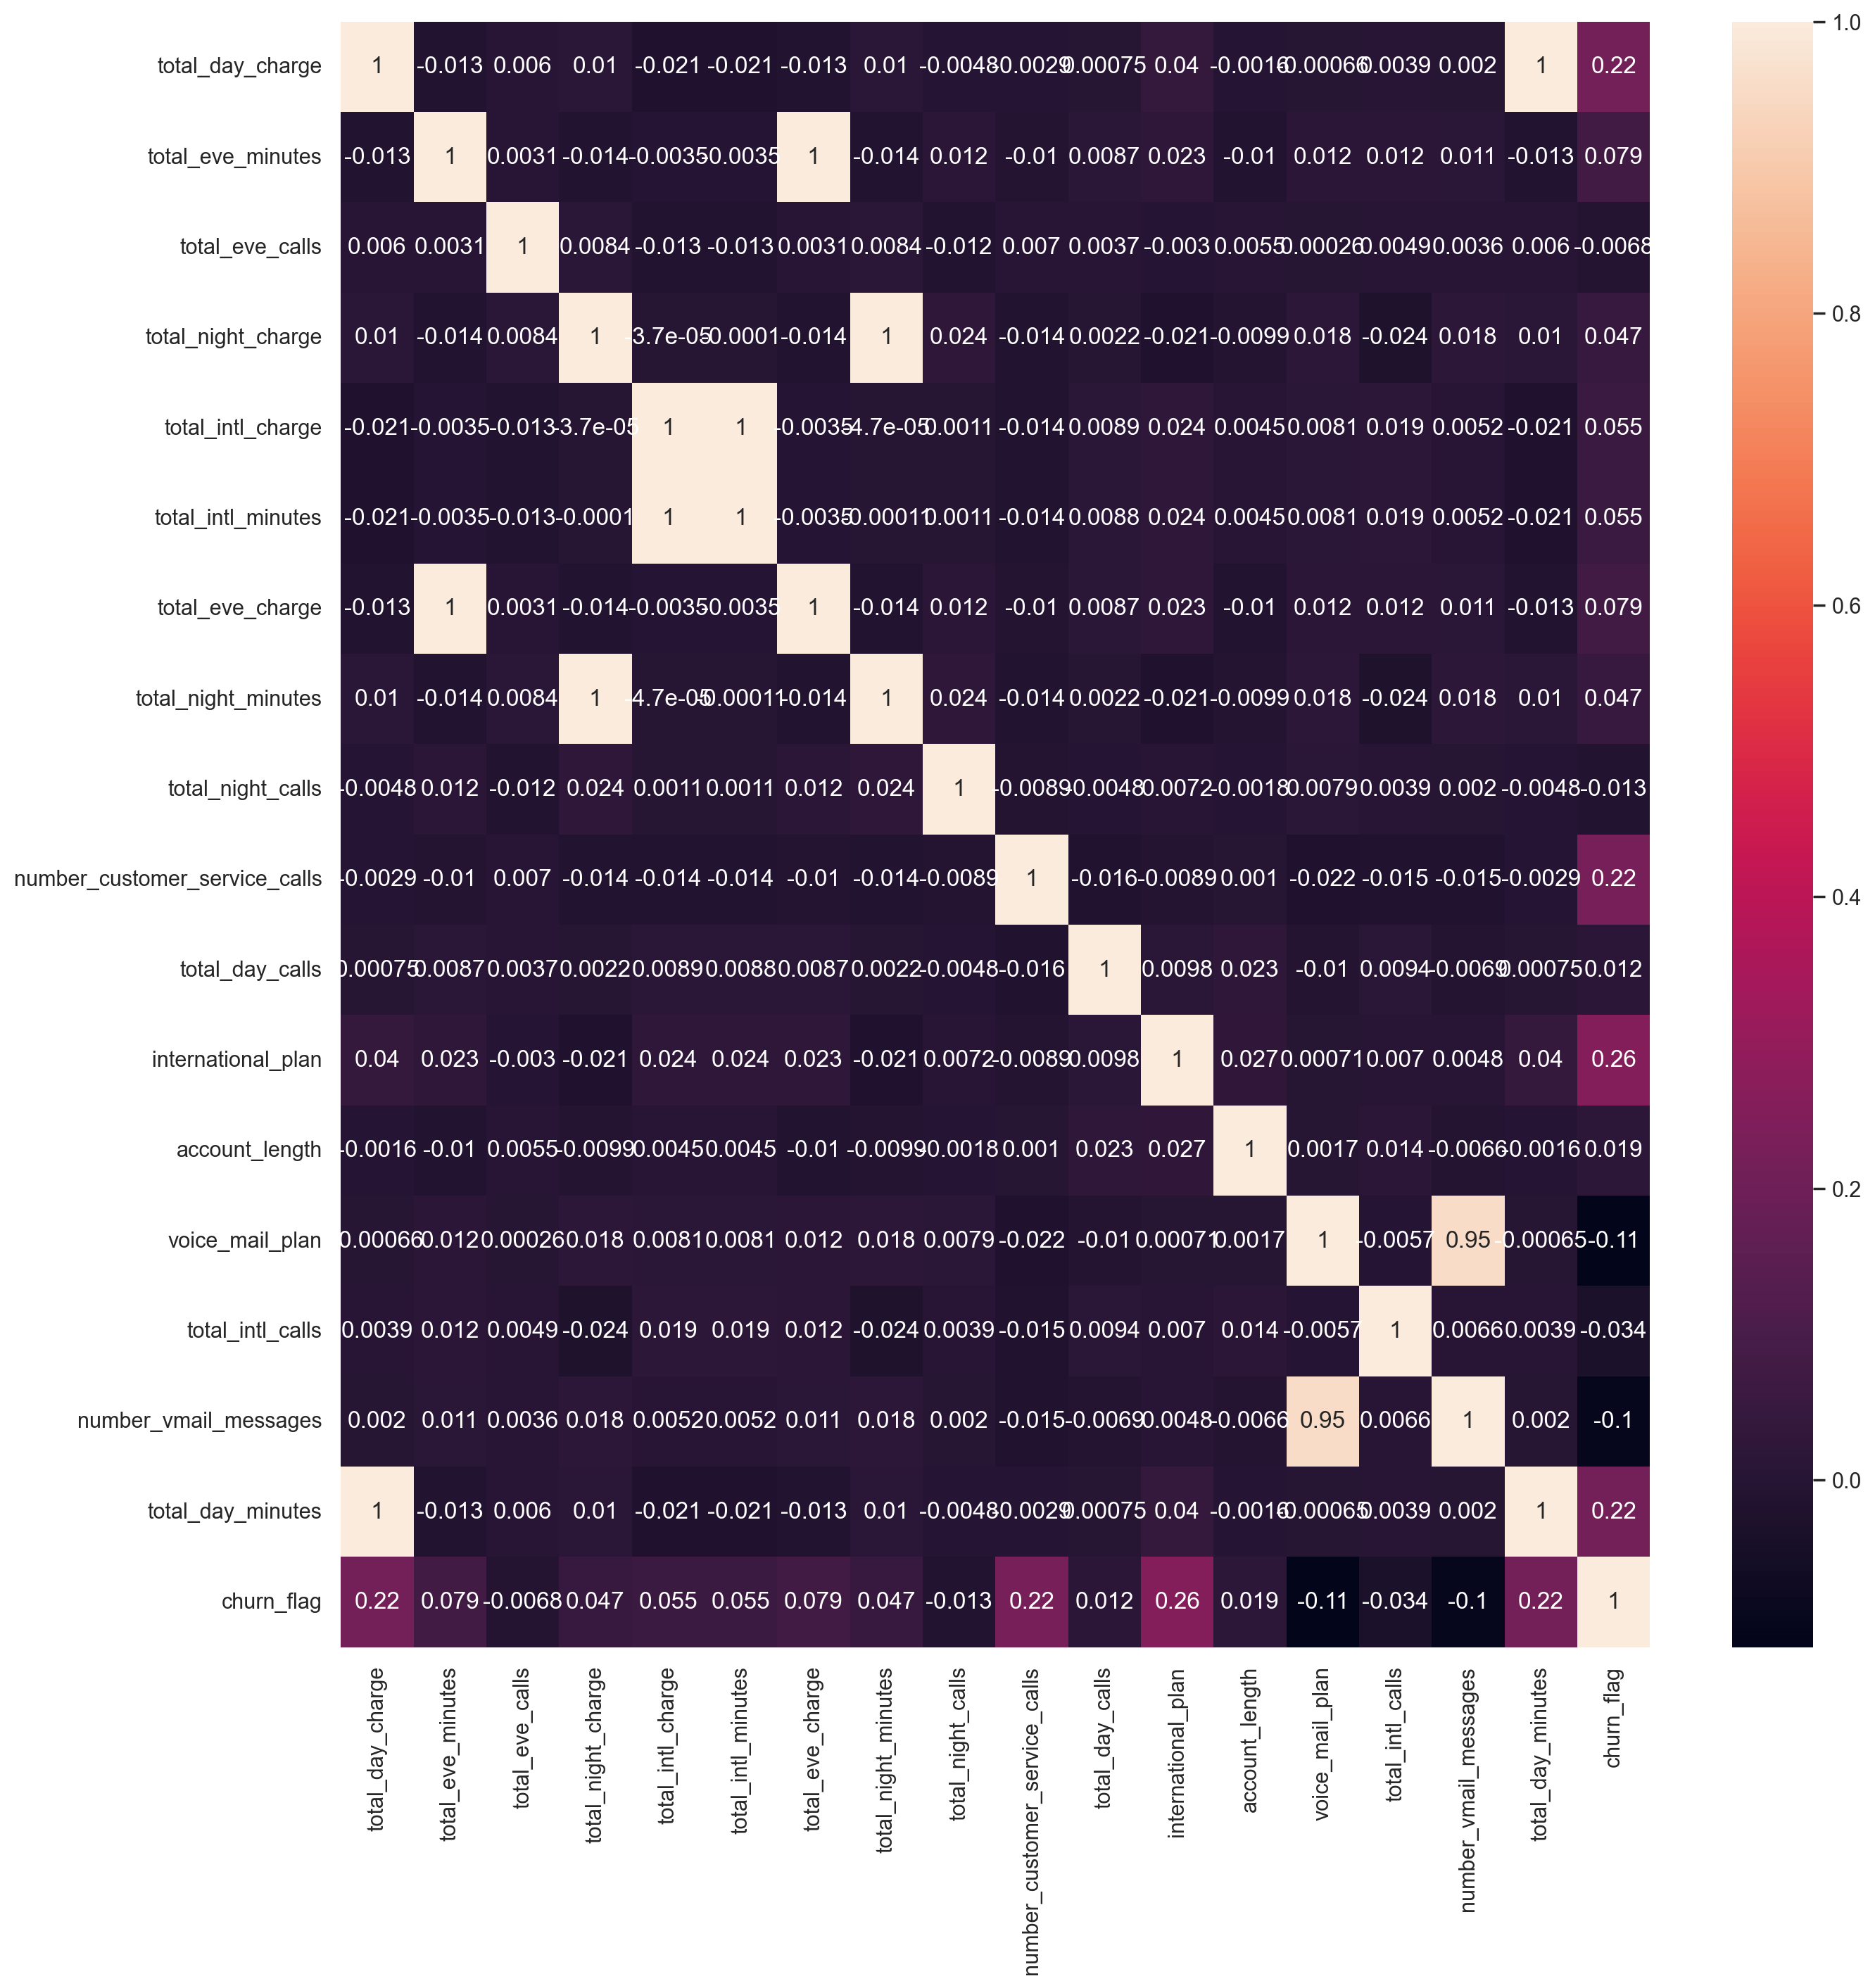

In [17]:
# Drop non-numerical variables
numerical = list(
    set(df.columns)
    - {
        "state",
        "area_code",
        "churn",
    }
)

plt.figure(figsize=(15,15))
# sns.heatmap(df.corr(),annot=True)
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix, annot=True);
plt.show()

In [18]:
df

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,churn_flag
0,OH,107,area_code_415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no,0
1,NJ,137,area_code_415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no,0
2,OH,84,area_code_408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no,0
3,OK,75,area_code_415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no,0
4,MA,121,area_code_510,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,area_code_415,0,0,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no,0
4246,WV,73,area_code_408,0,0,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no,0
4247,NC,75,area_code_408,0,0,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no,0
4248,HI,50,area_code_408,0,1,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no,0


In [19]:
df.shape

(4250, 21)

Based on the colored correlation matrix generated above, we can see that there are 4 variables such as Total day charge that have been calculated directly from the number of minutes spent on phone calls (Total day minutes). These are called dependent variables and can therefore be left out since they do not contribute any additional information.

In [20]:
# Drop not related columns
"""
state = State from user location
area_code = Phone number prefix based on state
churn = output variabel not included in model
total_day_charge, total_eve_charge, total_night_charge, total_intl_charge = Calculated directly from the number of minutes spent on phone calls
"""
df.drop(["state","area_code", "churn", "total_day_charge", 
         "total_eve_charge", "total_night_charge", "total_intl_charge"], 
         axis=1, inplace=True)

In [21]:
df.shape

(4250, 14)

In [22]:
df

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls,churn_flag
0,107,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0
1,137,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0
2,84,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0
3,75,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0
4,121,0,1,24,218.2,88,348.5,108,212.6,118,7.5,7,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,83,0,0,0,188.3,70,243.8,88,213.7,79,10.3,6,0,0
4246,73,0,0,0,177.9,89,131.2,82,186.2,89,11.5,6,3,0
4247,75,0,0,0,170.7,101,193.1,126,129.1,104,6.9,7,1,0
4248,50,0,1,40,235.7,127,223.0,126,297.5,116,9.9,5,2,0


In [25]:
"""
ax = sns.countplot(x=df["number_customer_service_calls"],
              hue=df["churn"])
for i in ax.containers:
    ax.bar_label(i,)

display(check_train_test_availability(features="number_customer_service_calls",train_data=df))
target_mean_agg(features=["number_customer_service_calls"],
                target = "churn_flag",
                data=df).reset_index().sort_values("number_customer_service_calls",ascending=True)
"""

'\nax = sns.countplot(x=df["number_customer_service_calls"],\n              hue=df["churn"])\nfor i in ax.containers:\n    ax.bar_label(i,)\n\ndisplay(check_train_test_availability(features="number_customer_service_calls",train_data=df))\ntarget_mean_agg(features=["number_customer_service_calls"],\n                target = "churn_flag",\n                data=df).reset_index().sort_values("number_customer_service_calls",ascending=True)\n'

In [26]:
drop_col = []
target_col = ["churn_flag"]
X = df.drop(drop_col+target_col,axis=1)
y = df[target_col]

col_for_model = X.columns.tolist()
print(X.shape, y.shape)

(4250, 13) (4250, 1)


In [27]:
X.head(2)

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls
0,107,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1
1,137,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0


In [28]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

test_size = 0.33
seed = 42
X_train, X_val, Y_train, Y_val = model_selection.train_test_split(X,
                                                                  y,
                                                                  test_size=test_size,
                                                                  random_state=seed,
                                                                  stratify = y)
print("Data Train:",X_train.shape, Y_train.shape)
print("Data Test:",X_val.shape, Y_val.shape)

Data Train: (2847, 13) (2847, 1)
Data Test: (1403, 13) (1403, 1)


In [29]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB

In [30]:
!pip install -U imbalanced-learn

In [31]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [32]:
model_lr = LogisticRegression()
model_dt = DecisionTreeClassifier()
model_rf = RandomForestClassifier()
model_gb = GradientBoostingClassifier(learning_rate=0.01, max_depth=5)
model_nb = GaussianNB()

print("Run Logistics Regression")
model_lr.fit(X_train, Y_train)
print("Run Decision Tree")
model_dt.fit(X_train, Y_train)
print("Run Random Forest")
model_rf.fit(X_train, Y_train)
print("Run Gradient Boosting")
model_gb.fit(X_train, Y_train)
print("Run Naive Bayes")
model_nb.fit(X_train, Y_train)

Run Logistics Regression
Run Decision Tree
Run Random Forest
Run Gradient Boosting
Run Naive Bayes


GaussianNB()

In [33]:
model_list = ["model_lr","model_dt","model_rf","model_gb","model_nb"]
score_train = []
score_test = []
for model in model_list:
  open_model = eval(model)
  result_train = open_model.score(X_train,Y_train)
  result_test = open_model.score(X_val,Y_val)
  score_train.append(result_train)
  score_test.append(result_test)

df_eval = pd.DataFrame()
df_eval["model"] = model_list
df_eval["acc_train"] = score_train
df_eval["acc_test"] = score_test
df_eval

,model,acc_train,acc_test
0,model_lr,0.865824,0.863150
1,model_dt,1.000000,0.922309
2,model_rf,1.000000,0.955096
3,model_gb,0.962417,0.944405
4,model_nb,0.860204,0.848182


In [34]:
def model_comparison_engine(X=X, y=y, fold = 5, sampling_method = None):

  kfold = model_selection.KFold(n_splits=fold, shuffle = True, random_state=42)

  model_lr = LogisticRegression()
  model_dt = DecisionTreeClassifier()
  model_rf = RandomForestClassifier()
  model_gb = GradientBoostingClassifier(learning_rate=0.01, max_depth=5)
  model_nb = GaussianNB()

  model_list = ["model_lr","model_dt","model_rf","model_gb","model_nb"]
  acc_list = []
  prec_list = []
  rec_list = []
  auc_list = []
  f1_list = []
  for model in model_list:
    print(model)
    open_model = eval(model)

    if sampling_method == 'SMOTE':
      X_resampled, y_resampled = SMOTE().fit_resample(X, y)
    elif sampling_method == 'oversampling':
      X_resampled, y_resampled = RandomOverSampler().fit_resample(X, y)
    elif sampling_method == 'undersampling':
      X_resampled, y_resampled = RandomUnderSampler().fit_resample(X, y)
    else:
      X_resampled, y_resampled = X, y

    accuracy = model_selection.cross_val_score(open_model, X_resampled, y_resampled, cv=kfold, scoring='accuracy')
    precision = model_selection.cross_val_score(open_model, X_resampled, y_resampled, cv=kfold, scoring='precision')
    recall = model_selection.cross_val_score(open_model, X_resampled, y_resampled, cv=kfold, scoring='recall')
    auc = model_selection.cross_val_score(open_model, X_resampled, y_resampled, cv=kfold, scoring='roc_auc')
    f1 = model_selection.cross_val_score(open_model, X_resampled, y_resampled, cv=kfold, scoring='f1')

    acc_list.append(accuracy.mean())
    prec_list.append(precision.mean())
    rec_list.append(recall.mean())
    auc_list.append(auc.mean())
    f1_list.append(f1.mean())

  df_eval = pd.DataFrame()
  df_eval["model"] = model_list
  df_eval["accuracy"] = acc_list
  df_eval["precision"] = prec_list
  df_eval["recall"] = rec_list
  df_eval["auc"] = auc_list
  df_eval["f1_score"] = f1_list

  return df_eval

In [35]:
model_comparison_engine(X=X, y=y, fold = 5, sampling_method = None)

model_lr
model_dt
model_rf
model_gb
model_nb


,model,accuracy,precision,recall,auc,f1_score
0,model_lr,0.859294,0.499234,0.103025,0.738548,0.169914
1,model_dt,0.916235,0.695849,0.734161,0.838915,0.713025
2,model_rf,0.952706,0.937252,0.712622,0.914403,0.819898
3,model_gb,0.940471,0.948228,0.611627,0.916940,0.743484
4,model_nb,0.859294,0.501079,0.416872,0.845309,0.453470


In [36]:
model_comparison_engine(X=X, y=y, fold = 5, sampling_method = "SMOTE")

model_lr
model_dt
model_rf
model_gb
model_nb


,model,accuracy,precision,recall,auc,f1_score
0,model_lr,0.687568,0.678496,0.712605,0.751661,0.695058
1,model_dt,0.878150,0.858390,0.896449,0.878253,0.879969
2,model_rf,0.937020,0.961856,0.908693,0.983242,0.935816
3,model_gb,0.858021,0.949473,0.756873,0.918103,0.842343
4,model_nb,0.674834,0.627560,0.861190,0.801198,0.725836


In [37]:
model_comparison_engine(X=X, y=y, fold = 5, sampling_method = "oversampling")

model_lr
model_dt
model_rf
model_gb
model_nb


,model,accuracy,precision,recall,auc,f1_score
0,model_lr,0.717003,0.713169,0.726830,0.779079,0.719621
1,model_dt,0.974535,0.954695,0.998578,0.974964,0.974683
2,model_rf,0.991922,0.983551,0.999466,0.999743,0.990092
3,model_gb,0.912788,0.951264,0.870318,0.944714,0.908894
4,model_nb,0.825028,0.831068,0.816115,0.845772,0.823408


In [38]:
model_comparison_engine(X=X, y=y, fold = 5, sampling_method = "undersampling")

model_lr
model_dt
model_rf
model_gb
model_nb


,model,accuracy,precision,recall,auc,f1_score
0,model_lr,0.733319,0.726197,0.750205,0.787112,0.736615
1,model_dt,0.814386,0.813092,0.838716,0.824196,0.817705
2,model_rf,0.887974,0.905301,0.861142,0.914116,0.882777
3,model_gb,0.875432,0.925535,0.816108,0.889699,0.867211
4,model_nb,0.809379,0.819525,0.793276,0.839971,0.805876


In [39]:
def train_model(X,y):
  model_gb = GradientBoostingClassifier(learning_rate=0.01, max_depth=5)
  model_gb.fit(X,y)
  return model_gb
model_churn = train_model(X,y)

In [40]:
X.columns

Index(['account_length', 'international_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_eve_minutes', 'total_eve_calls', 'total_night_minutes',
       'total_night_calls', 'total_intl_minutes', 'total_intl_calls',
       'number_customer_service_calls'],
      dtype='object')

In [41]:
df_imp = pd.DataFrame()
df_imp["features"] = X.columns.tolist()
df_imp["importance"] = model_churn.feature_importances_
df_imp.sort_values("importance",ascending=False)

,features,importance
4,total_day_minutes,0.339269
12,number_customer_service_calls,0.142660
6,total_eve_minutes,0.140560
10,total_intl_minutes,0.106666
11,total_intl_calls,0.085484
1,international_plan,0.084416
2,voice_mail_plan,0.038967
3,number_vmail_messages,0.027002
8,total_night_minutes,0.025049
5,total_day_calls,0.004360


In [42]:
import pickle
from imblearn.over_sampling import SMOTE

# Assume X_train and Y_train are your training data and labels

# Apply SMOTE to the training data
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, Y_train)

# Train the RandomForest model
model_rf = RandomForestClassifier()
model_rf.fit(X_resampled, y_resampled)

# Save the model to a file using pickle
model_filename = 'model_rf_smote.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(model_rf, file)

print(f'Model saved to {model_filename}')


Model saved to model_rf_smote.pkl
